🌊 Predicting Significant Wave Heights for Ocean Exploration (70/100)
Welcome to MSC-AI Consulting! You are leading a consulting team in an important project with a top client, the Global Ocean Exploration Initiative (GOEI). This client focuses on understanding the dynamic nature of oceanic waves and their potential impact on marine operations.

📄 Client’s Brief
GOEI has provided you with a dataset that records oceanic and environmental conditions, and they would like you to predict significant wave heights (Hsig) based on these conditions. Accurate wave height predictions are crucial for planning maritime operations and ensuring safety.

Understanding the Data
The data provided in Hs.csv includes several features that capture environmental and oceanic conditions related to wave height. Here are the key columns in the dataset:

Hsig: Significant wave height, measured in meters, which serves as the target variable for your regression model. Predicting this feature accurately is essential for understanding ocean conditions.
Temperature: Represents the water temperature, which can be analyzed in its continuous form or transformed into categories (e.g., Low, Moderate, High) to capture potential temperature bands.
Wind Speed: The speed of the wind measured in meters per second (m/s). Wind speed is a critical factor that influences wave heights and ocean conditions.
Wave Direction (Dir): The direction from which the waves are approaching, measured in degrees (0° - 360°). This feature can help reveal patterns associated with wave height depending on the wave’s origin.
Depth: The depth of the water at the measurement location, measured in meters. Depth provides context for interpreting oceanic conditions at different levels below the surface.
X-Windv and Y-Windv: Components of wind velocity along the x-axis and y-axis, which capture directional wind forces.
Season: Represents the seasonal classification (e.g., Winter, Spring, Summer, Fall) for each measurement, allowing you to capture potential seasonal effects on wave heights.
Wind_Dir_Category: A categorical version of Wave Direction, grouped into broader directional categories (e.g., North, East, South, West) for simplified analysis of directional effects on wave height.
Part 1: Data Preprocessing
Objective
Your primary goal is to predict Hsig (significant wave height).

Train-Test Split
Begin by splitting the dataset into 70% for training and 30% for testing. Given the structure of this project, there’s no need for a separate validation set, as GOEI wants you to maximize training data usage through cross-validation.

Data Preprocessing
Use insights from your EDA to inform preprocessing steps. While specific steps are up to you, standard preprocessing tasks should be implemented.
The client has confirmed that no outliers are present in the dataset, so outlier handling is unnecessary.
Feature Engineering and Selection
In addition to all standard steps (e.g., addressing collinearity and encoding categorical variables), GOEI encourages you to explore potential feature transformations that could improve predictive performance. such as Binning and/or interaction terms.

Name your final preprocessing pipeline as prep_pipe.

Part 2: Model Selection and Evaluation
With your data preprocessed and features prepared, GOEI requests a structured approach to model selection and evaluation. Follow these steps:

Baseline Model: Start by fitting a parametric linear model as a baseline. Evaluate this model using both R² and Mean Squared Error (MSE) as performance metrics. These metrics will serve as a reference to assess improvements with other models.

Ensemble Models: GOEI is interested in seeing how ensemble methods perform on this dataset. Choose two ensemble models. To tune these models, use RandomizedSearchCV with 5-fold cross-validation (cv=5) and explore two different hyperparameters for each model

Performance Evaluation: For each model, evaluate performance on R² and MSE. Based on the results, choose the best-performing model and save it as final_model. Record the best hyperparameters used in this model as Best_parameters.

Test Set Evaluation: Use the final_model to predict on the test set and assess performance using R² and MSE. Report these metrics as evidence of the model’s effectiveness on unseen data.

📊 GOEI’s Assessment Criteria -- 70 points overall
Your work will be evaluated based on the following criteria:

Pipeline Structure and Implementation: 14 points
Effective and organized implementation of the pipeline, covering both data preprocessing (prep_pipe) and modeling steps. A structured and reusable pipeline.

Data Preprocessing and Feature Engineering (Part 1): 33 points
Evidence-based data preparation steps informed by EDA insights.
Thoughtful and relevant feature engineering transformations and interactions that demonstrate innovation and alignment with the problem context.
Attention to collinearity, data transformations, and the creation of meaningful features that capture underlying data relationships.
Model Selection, Tuning, and Evaluation (Part 2): 23 points
Appropriate choice of a baseline model and ensemble models.
Evidence of hyperparameter tuning using RandomizedSearchCV with clear documentation of parameters and cross-validation.
Thorough performance evaluation on both the training (cross-validation) and test sets using R² and MSE, demonstrating a standard, evidence-based approach in model selection and assessment.
Documentation
Use concise markdown explanations (less than a line each) to explain each preprocessing and modeling step, highlighting what you’re doing and why.
Summarize your final choices and rationale in a short paragraph, emphasizing the evidence that informed each decision.
GOEI values a well-justified approach over specific performance numbers, so focus on following the requirements and showing thoughtful, evidence-based innovation in your work. Remember to set random_state=42 where needed for reproducibility.

### Load Data

In [202]:
import pandas as pd
df = pd.read_csv('dsml-2024-esemsc-tm1724/data/Hs.csv')
df.head()

# Ensure all tranforms output pandas datafames
import numpy as np                   
from sklearn import set_config
set_config(transform_output="pandas") 

In [203]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

### Train Test Split

In [204]:
# Drop duplicates

# check the duplication in our data
df.duplicated().sum()

# Drop duplicates
df = df.drop_duplicates()
df

,Xp,Yp,Hsig,Dir,Depth,X-Windv,Y-Windv,U10,Season,Temperature,Wind_Speed,Wave_Steepness,Wind_Dir_Category
0,52.57,27.38,0.03444,353.248,35.6057,0.3128,-1.7557,1.06,Summer,14.045279,1.783347,0.023272,West
1,52.57,27.38,0.03459,350.817,35.6057,0.4156,-1.0176,0.40,Summer,13.727790,1.099197,0.022787,West
2,52.57,27.38,0.03479,354.399,35.6057,0.4148,-1.7209,1.26,Summer,14.120766,1.770185,0.025072,West
3,52.57,27.38,0.03502,348.335,35.6057,0.1343,-0.3577,1.39,Fall,14.558437,0.382081,0.022834,West
4,52.57,27.38,0.03545,138.355,35.6057,1.9610,-0.3797,1.06,Summer,13.679845,1.997422,0.016984,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68749,52.57,27.38,2.24306,339.115,35.6057,6.8704,NaN,NaN,Summer,14.243705,13.303214,0.330771,West
68750,52.57,27.38,2.25083,339.343,35.6057,7.2808,-10.4924,NaN,Summer,13.259548,12.771081,0.326259,West
68751,52.57,27.38,2.26386,338.824,35.6057,6.9706,-11.1817,NaN,Summer,13.779675,13.176482,0.331342,West
68752,52.57,27.38,2.26635,339.089,35.6057,7.1793,-10.7252,NaN,Summer,13.662218,12.906288,0.328542,West


#### Identifying Targets

In [208]:
# Seperate Target Feature
y = df['Hsig'] 
X = df.drop(columns=['Hsig']) 

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [209]:
# We are told there are no outliars but lets check to be sure
X_train.describe()

,Xp,Yp,Dir,Depth,X-Windv,Y-Windv,U10,Temperature,Wind_Speed,Wave_Steepness
count,4.812500e+04,48125.00,48125.000000,4.812500e+04,48125.000000,48111.000000,367.000000,48119.000000,48113.000000,48117.000000
mean,5.257000e+01,27.38,220.353672,3.560570e+01,1.695938,-1.250506,3.053188,13.798608,3.884876,0.120883
std,2.842200e-14,0.00,150.766707,1.421100e-14,2.879089,2.823709,2.424080,0.497437,2.371340,0.051925
min,5.257000e+01,27.38,0.000000,3.560570e+01,-9.087300,-11.874300,0.000000,11.564120,0.035977,0.015663
25%,5.257000e+01,27.38,63.358000,3.560570e+01,-0.272400,-3.090000,1.420000,13.460457,2.094586,0.083079
50%,5.257000e+01,27.38,340.038000,3.560570e+01,1.597400,-1.274100,2.450000,13.802713,3.237759,0.114889
75%,5.257000e+01,27.38,353.493000,3.560570e+01,3.594300,0.665050,3.935000,14.135796,5.278546,0.150860
max,5.257000e+01,27.38,359.998000,3.560570e+01,12.412800,11.782200,12.290000,16.036464,13.467091,0.335863


#### Handling Missing Data

In [210]:
# Calculating the percentage of missing values in each column
missing = X_train.isnull().sum() / len(X_train) 
print(missing)

# Dropping columns with more than 30% missing values
features_to_drop = missing[missing > 0.3].index
X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)

Xp                   0.000000
Yp                   0.000000
Dir                  0.000000
Depth                0.000000
X-Windv              0.000000
Y-Windv              0.000291
U10                  0.992374
Season               0.000125
Temperature          0.000125
Wind_Speed           0.000249
Wave_Steepness       0.000166
Wind_Dir_Category    0.000125
dtype: float64


In [211]:
# Separate numerical and categorical data in X_train
X_train_numeric = X_train.select_dtypes(include=[np.number])     
X_train_categorical = X_train.select_dtypes(exclude=[np.number]) 

# Separate numerical and categorical data in X_test
X_test_numeric = X_test.select_dtypes(include=[np.number])     
X_test_categorical = X_test.select_dtypes(exclude=[np.number]) 

In [212]:
# Imputation for numerical data
imputer = SimpleImputer(strategy='median')
X_train_numeric = imputer.fit_transform(X_train_numeric)
X_test_numeric = imputer.transform(X_test_numeric)

# Imputation for categorical data
imputer = SimpleImputer(strategy='most_frequent')
X_train_categorical = imputer.fit_transform(X_train_categorical)
X_test_categorical = imputer.transform(X_test_categorical)

In [213]:
# Concatenate them back together
X_train = pd.concat([X_train_numeric, X_train_categorical], axis = 1)
X_test = pd.concat([X_test_numeric, X_test_categorical], axis = 1)

In [94]:
# Calculating the percentage of missing values in each column
missing = X_train.isnull().sum() / len(X_train)


### Encoding Categorical Variables

In [214]:
# Identify categorical features in the dataframe
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

# Instantiate the encoder
ohe = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to all categorical features
X_train_encoded = ohe.fit_transform(X_train[categorical_features])
X_test_encoded = ohe.transform(X_test[categorical_features])

# Create a DataFrame with encoded column names for each category
encoded_columns = ohe.get_feature_names_out(categorical_features)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_columns)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_columns)
print(X_train_encoded.shape)

# Drop the original categorical columns and concatenate the encoded columns
X_train = pd.concat([X_train.drop(columns=categorical_features), X_train_encoded], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_features), X_test_encoded], axis=1)
print(X_train.shape)

X_train.head()

(48125, 7)
(48125, 16)


,Xp,Yp,Dir,Depth,X-Windv,Y-Windv,Temperature,Wind_Speed,Wave_Steepness,Season_Fall,Season_Spring,Season_Summer,Wind_Dir_Category_East,Wind_Dir_Category_North,Wind_Dir_Category_South,Wind_Dir_Category_West
67190,52.57,27.38,348.801,35.6057,4.9390,-6.3596,14.466337,8.052219,0.224831,0.0,0.0,1.0,0.0,0.0,0.0,1.0
53616,52.57,27.38,358.303,35.6057,-0.8858,-2.5059,14.245134,2.657852,0.124806,0.0,0.0,1.0,0.0,0.0,0.0,1.0
42844,52.57,27.38,351.653,35.6057,4.2810,-2.1436,14.020267,4.787691,0.133315,0.0,0.0,1.0,0.0,0.0,0.0,1.0
41054,52.57,27.38,344.927,35.6057,5.5828,-1.2542,14.057357,5.721947,0.152197,0.0,0.0,1.0,0.0,0.0,0.0,1.0
65293,52.57,27.38,350.382,35.6057,5.1028,-5.4646,13.167133,7.476658,0.203409,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### EDA

In [215]:
import seaborn as sns

#### Data Visualisation

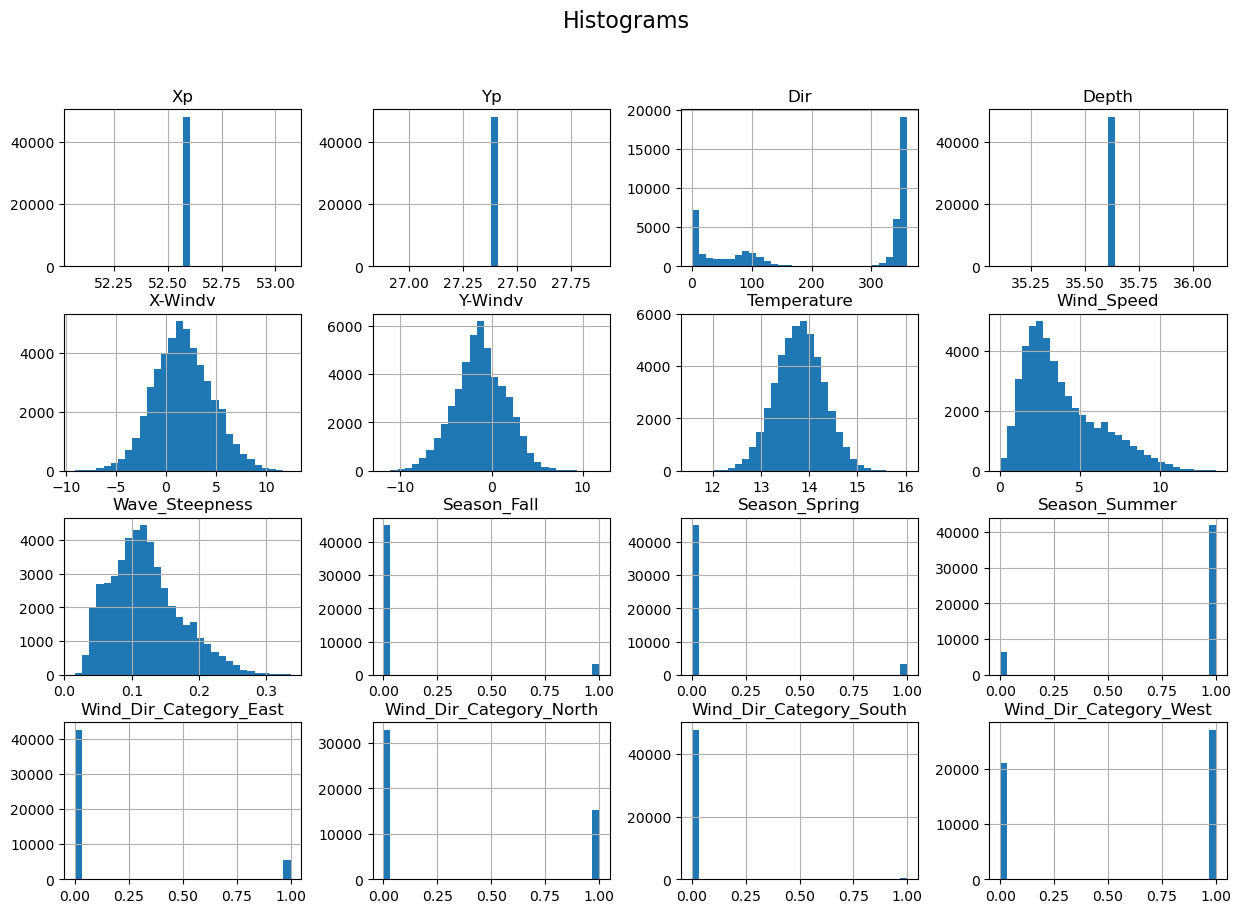

In [78]:
# Histograms
X_train.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms', fontsize=16)
plt.show()

We can see from the histograms that Xp, Yp and Depth only have 1 value each, so we can get rid of them as they will provide nothing usefull to our model

In [216]:
# Remove useless features

X_train = X_train.drop(columns = ['Depth', 'Xp', 'Yp'])
X_test = X_test.drop(columns = ['Depth', 'Xp', 'Yp'])

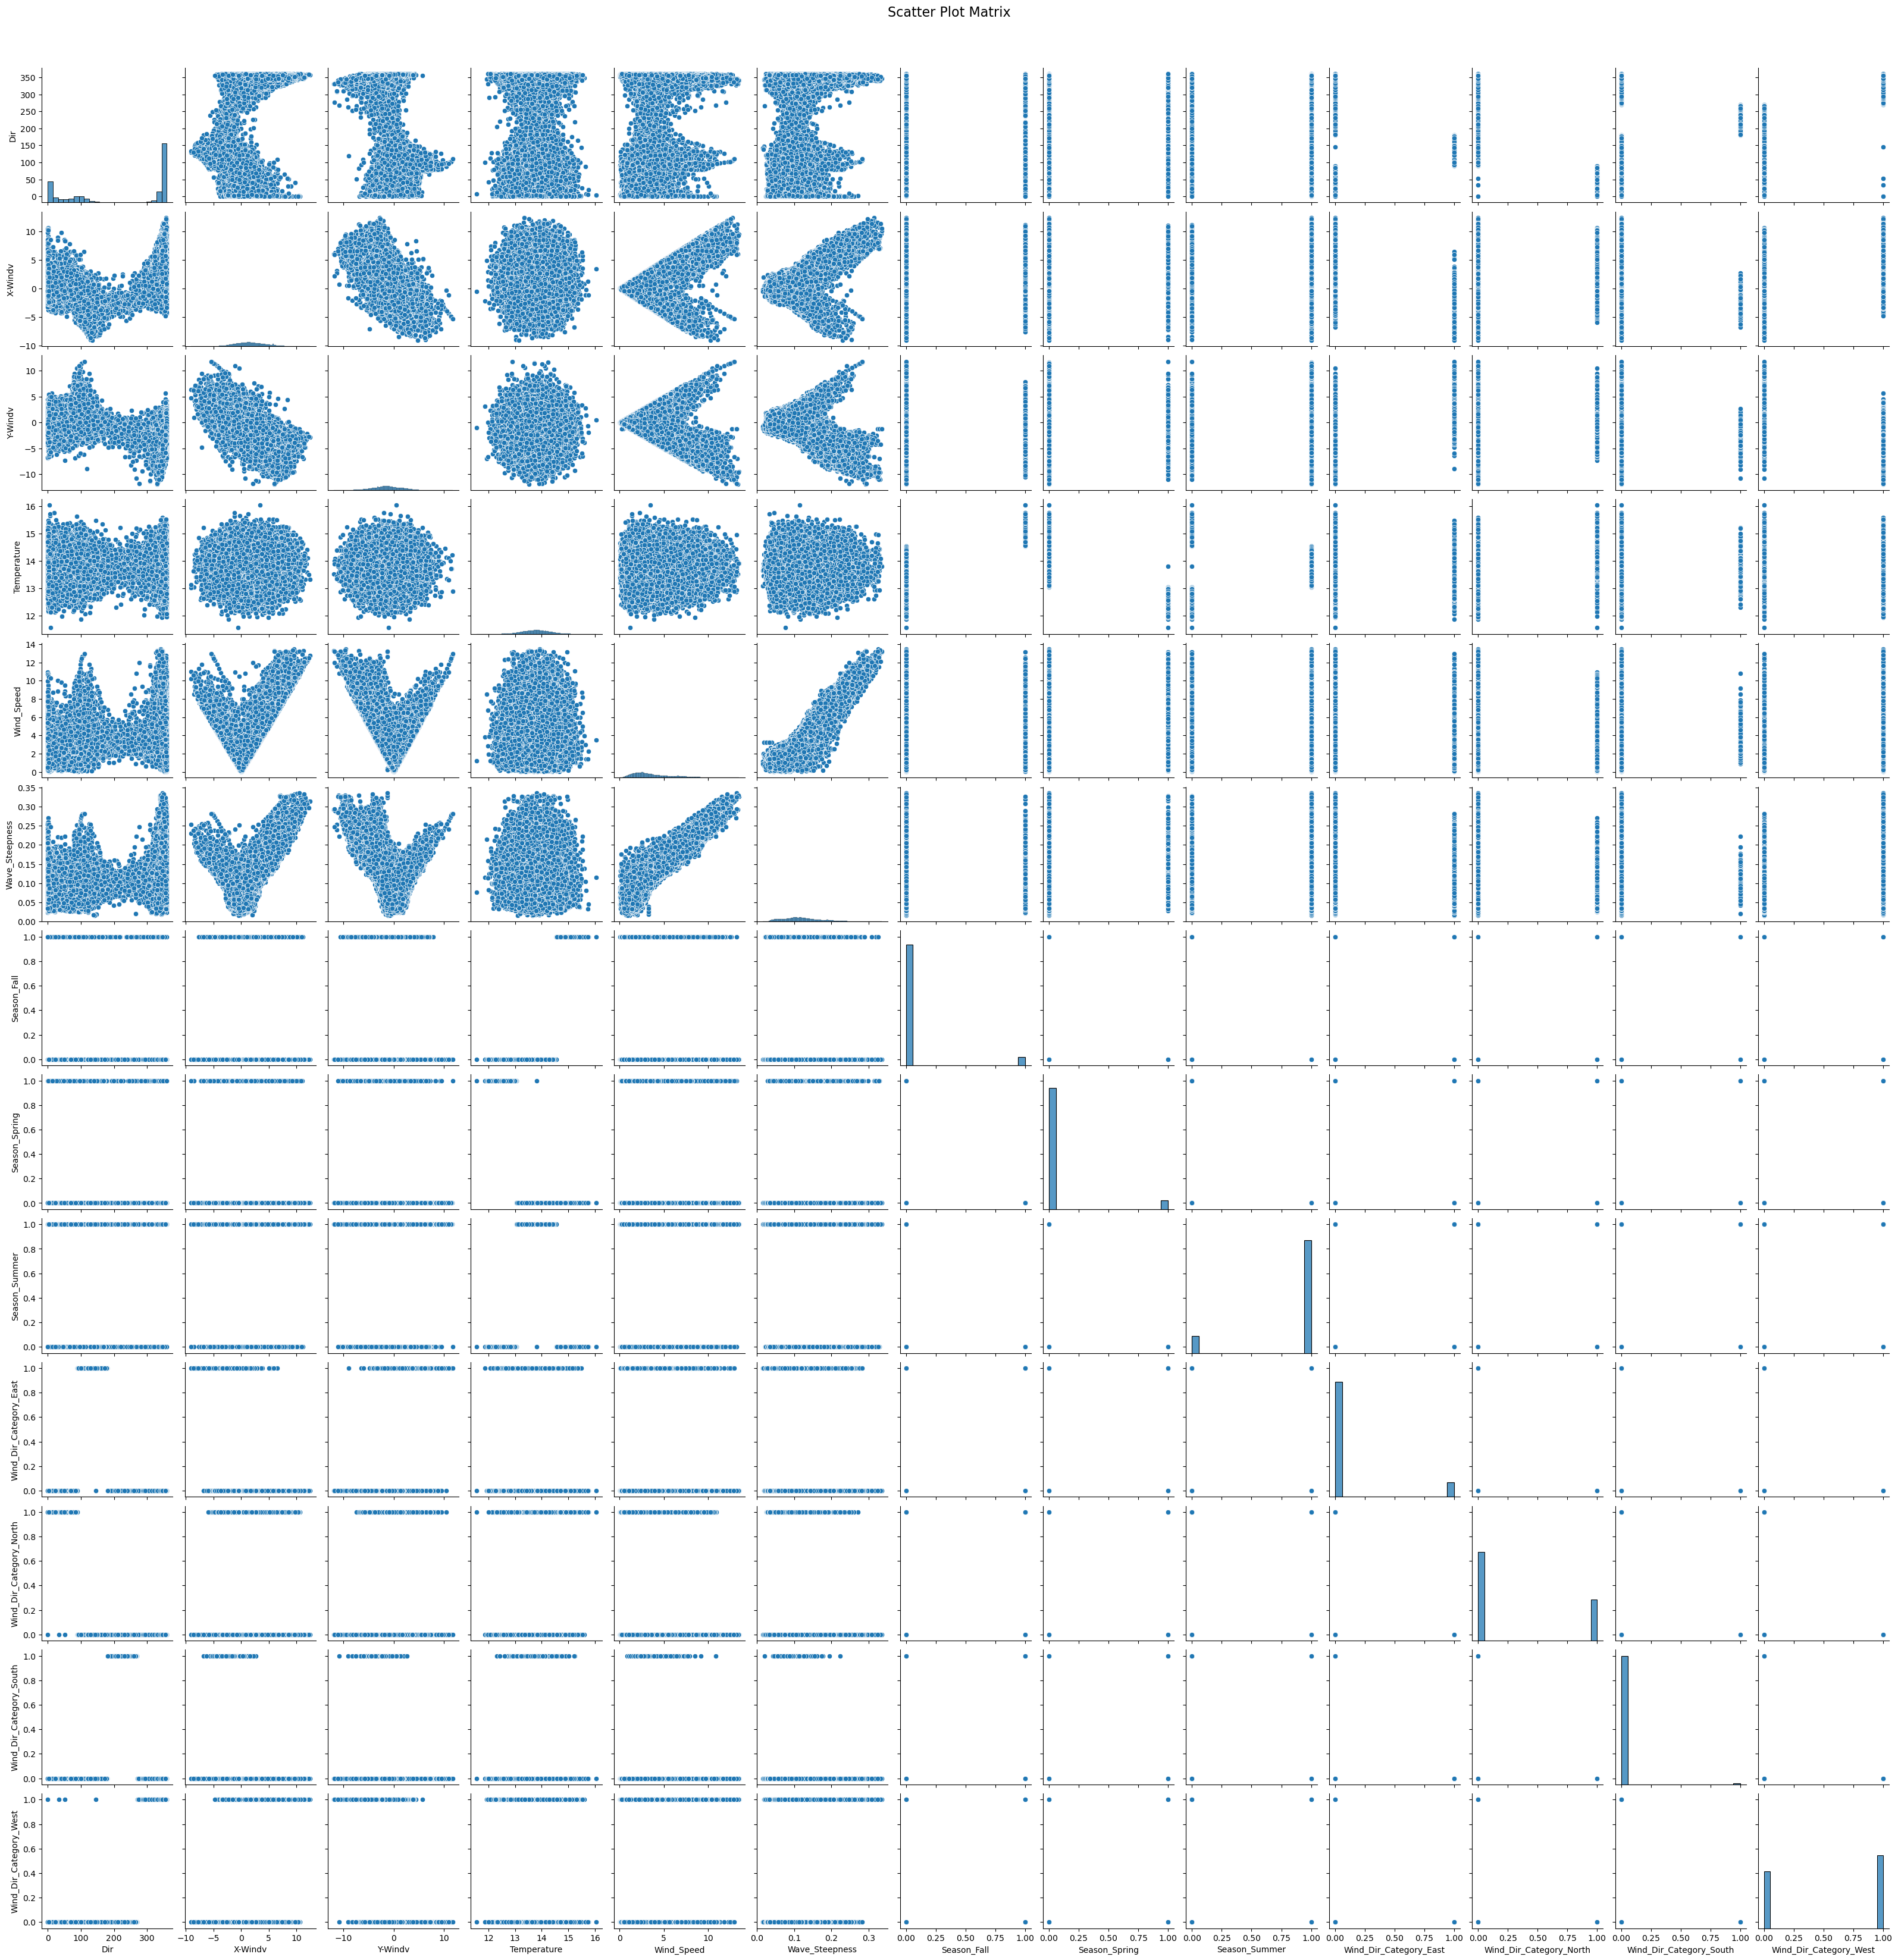

In [401]:
#  Scatter Plots
sns.pairplot(X_train)
plt.suptitle('Scatter Plot Matrix', y=1.02, fontsize=16)
plt.show()

### Check Correlations

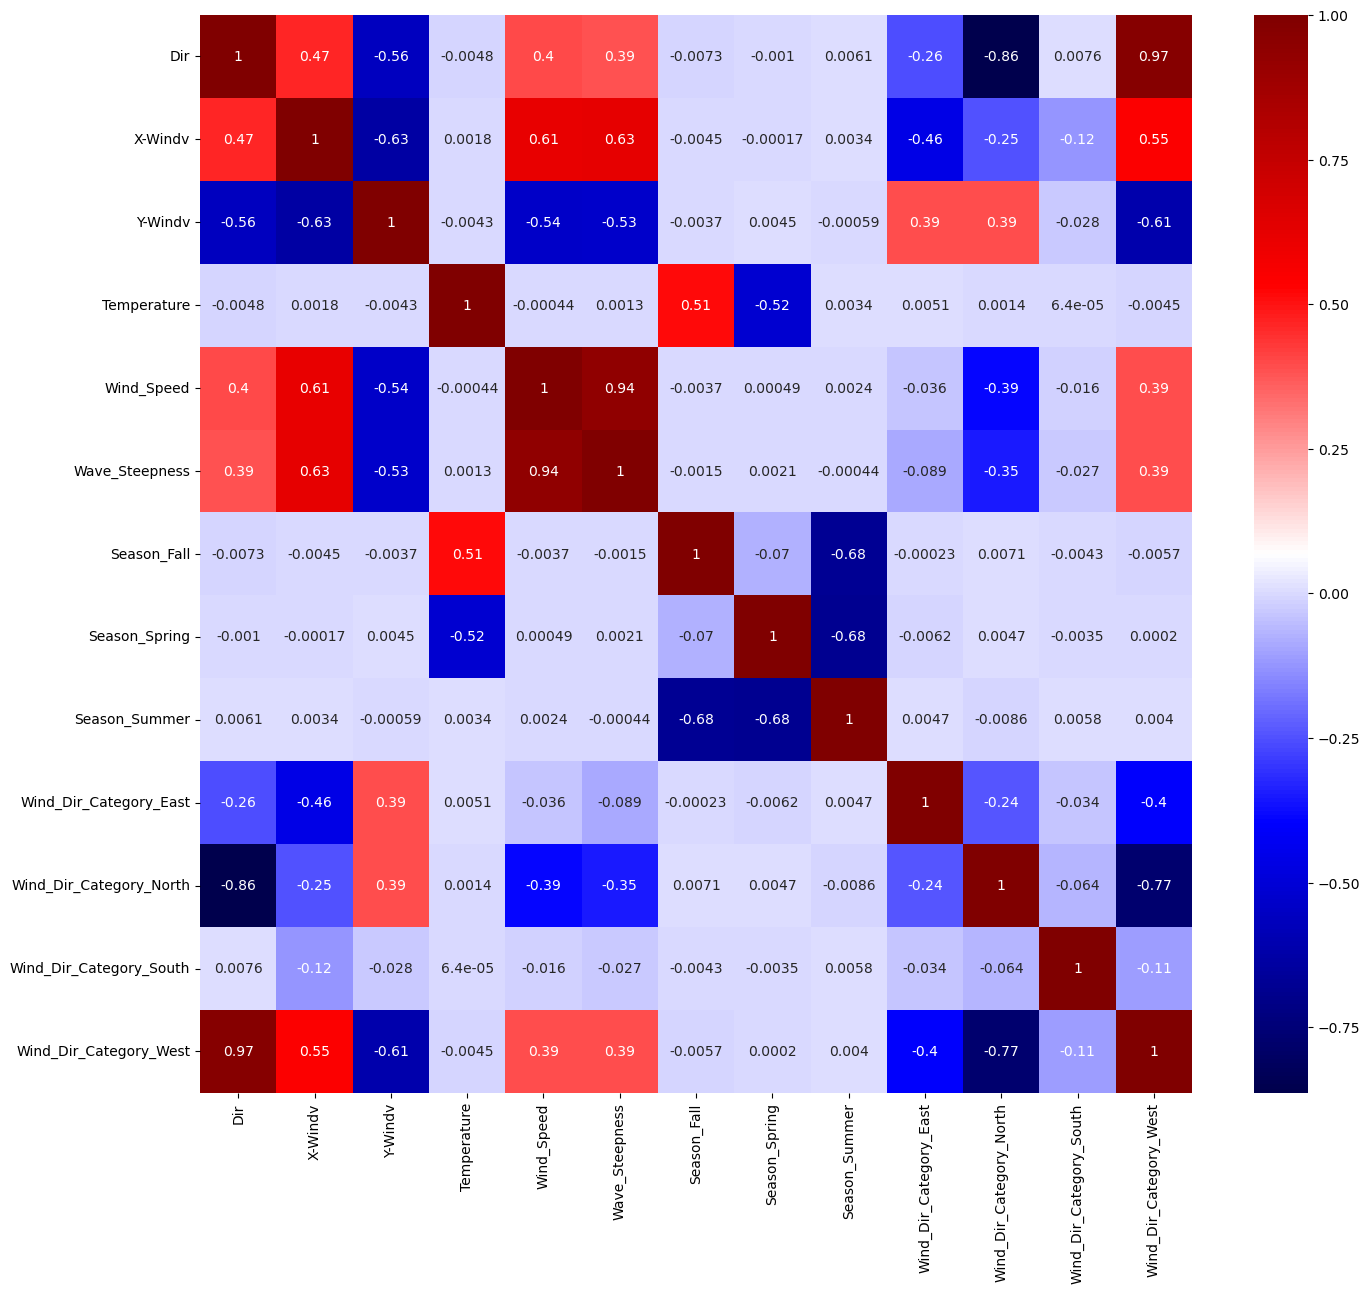

In [80]:
corr = X_train.corr()
corr

fig, ax = plt.subplots(1,1, figsize=(16,14))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "seismic",ax=ax, annot=corr);

From the heatmap we can see that there are 3 combinations with high correlation, lets remove one feature from each of them

In [98]:
X_train.drop(columns = ['Wind_Dir_Category_North', 'Wind_Dir_Category_West'])
X_test.drop(columns = ['Wind_Dir_Category_North', 'Wind_Dir_Category_West'])

,Dir,X-Windv,Y-Windv,Temperature,Wind_Speed,Wave_Steepness,Season_Fall,Season_Spring,Season_Summer,Wind_Dir_Category_East,Wind_Dir_Category_South
22793,357.685,3.8637,-0.8254,14.703654,3.950881,0.113285,1.0,0.0,0.0,0.0,0.0
55679,356.068,5.0912,-1.6440,13.454132,5.350052,0.162555,0.0,0.0,1.0,0.0,0.0
63139,332.805,4.9871,-7.1337,13.509618,8.704070,0.209120,0.0,0.0,1.0,0.0,0.0
6675,14.502,1.8906,-1.0945,14.185390,2.184559,0.077122,0.0,0.0,1.0,0.0,0.0
30941,83.132,-2.5581,1.3048,13.235519,2.871651,0.091472,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
25173,353.898,0.8278,-2.8446,13.566644,2.962601,0.094093,0.0,0.0,1.0,0.0,0.0
49806,343.215,6.4590,-2.6323,13.537780,6.974789,0.167969,0.0,0.0,1.0,0.0,0.0
39672,84.656,-2.6307,3.8180,13.570259,4.636562,0.129556,0.0,0.0,1.0,0.0,0.0
41626,80.643,-2.0792,0.0560,14.217105,2.079954,0.091042,0.0,0.0,1.0,0.0,0.0


#### Bining Temp to simplify model

In [100]:
# I have left this out as I could not get the bins give a fair distribution of the temp data however an attempt was made 

#X_train['Temperature'] = pd.cut(X_train['Temperature'], bins=[float('-inf'), 13.790, 13.798, float('inf')], labels=False)
#X_test['Temperature'] = pd.cut(X_test['Temperature'], bins=[float('-inf'), 13.790, 13.798, float('inf')], labels=False)


## Scaling

In [218]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

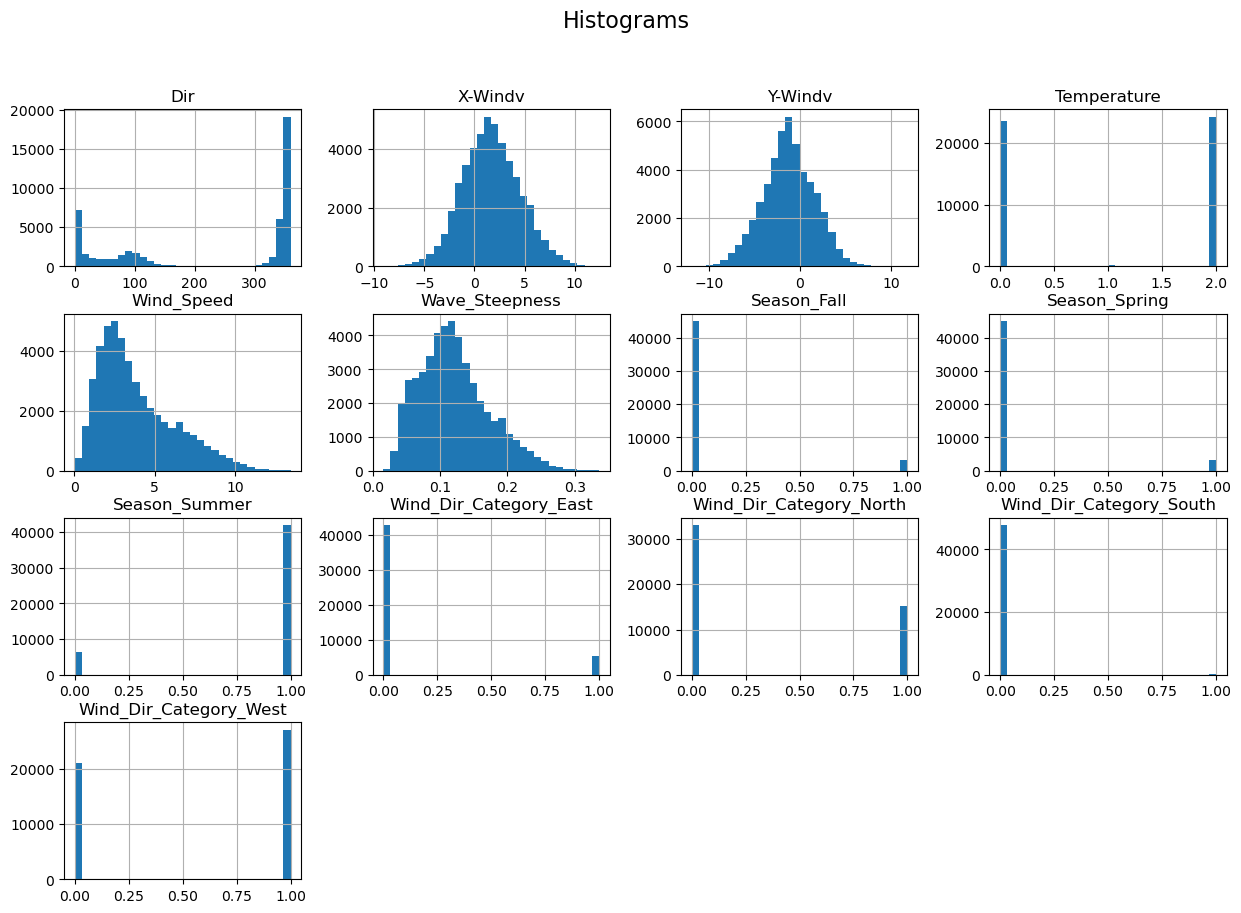

In [103]:
# Histograms
X_train.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms', fontsize=16)
plt.show()

we can see from the histograms that X_windv, Y_windv and Temp are all normally distributed, while wind speed and wave steepness are posatively skewed

In [219]:
# Lets scale accordingly using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ('SScaler', StandardScaler(), ['X-Windv', 'Y-Windv', 'Temperature']), 
        ('RScaler', RobustScaler(), ['Wind_Speed', 'Wave_Steepness', 'Dir']),      
    ],
    remainder='passthrough' 
)

# Apply the transformations to the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

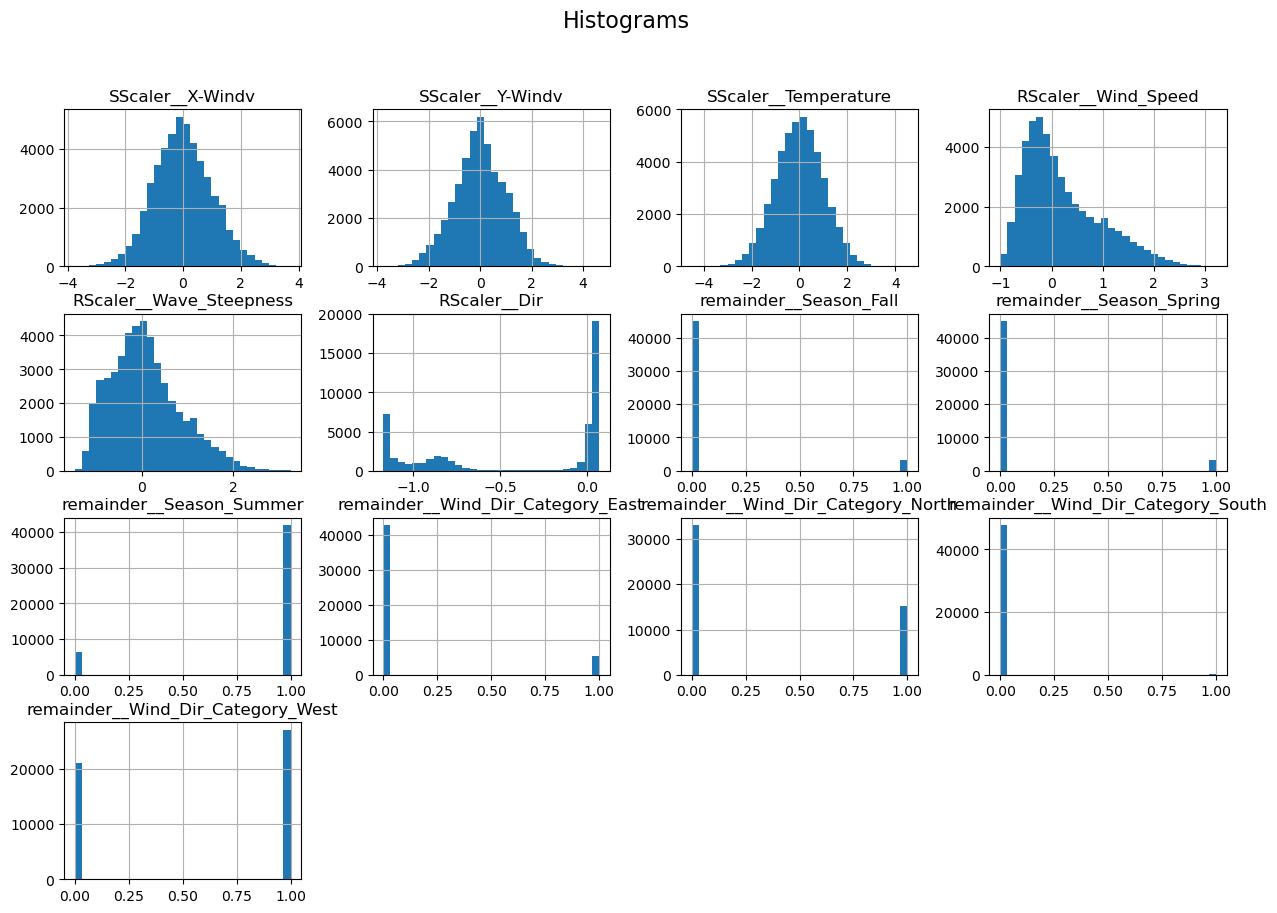

In [501]:
# Histograms
X_train_transformed.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms', fontsize=16)
plt.show()

### Modelling

#### Fitting a standard linear regression model as a benchmark

In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Lets fit our data to a linear regression model as a baseline

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

In [226]:
# Evaluate the model using R2 and MSE

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 0.016638810498791137
R² Score: 0.8553601311622182


#### Testing Ensemble Models

In [229]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
import numpy as np


#### Ada Boost Regressor

In [230]:
adaboost = AdaBoostRegressor(n_estimators=50, random_state=42)
scoring = ['neg_mean_squared_error', 'r2']
cv_results = cross_validate(adaboost, X_train, y_train, scoring = scoring, cv=5)

In [231]:
print('mean mse: ',-1*cv_results['test_neg_mean_squared_error'].mean())
print('std dev: ', cv_results['test_r2'].mean())

mean mse:  0.01512443490520848
std dev:  0.8693295642965777


#### Gradient Boost Regressor

In [232]:
gbr = GradientBoostingRegressor(
    n_estimators=100, 
    learning_rate=0.1
)

scoring = ['neg_mean_squared_error', 'r2']
cv_results = cross_validate(gbr, X_train, y_train, scoring = scoring, cv=5)

In [233]:
print('mean mse: ',-1*cv_results['test_neg_mean_squared_error'].mean())
print('r2: ', cv_results['test_r2'].mean())

mean mse:  0.005559402967797204
r2:  0.951976800343248


#### HyperParameter Tuning


In [235]:
# Define models
ada_regressor = AdaBoostRegressor()


# Define the hyperparameters to tune for each model
param_dist = {
    'n_estimators': [50, 100, 150, 200],       
    'learning_rate': [0.01, 0.1, 0.5, 1.0]     
}

# Define scoring metrics
scoring = ['neg_mean_squared_error', 'r2']

# Create RandomizedSearchCV objects
random_search_ada = RandomizedSearchCV(ada_regressor, param_dist, n_iter=10, cv=5, scoring=scoring, random_state=42, n_jobs=-1, refit='neg_mean_squared_error')
random_search_ada.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, refit='neg_mean_squared_error',
                   scoring=['neg_mean_squared_error', 'r2'])

In [239]:

# Print the best parameters and scores for AdaBoost Regressor
print("Best AdaBoost Regressor Hyperparameters: ", random_search_ada.best_params_)
best_ABG_model = random_search_ada.best_estimator_

Best AdaBoost Regressor Hyperparameters:  {'n_estimators': 100, 'learning_rate': 0.1}


In [240]:
# Define models
gb_r = GradientBoostingRegressor()

# Define the hyperparameters to tune for each model
param_dist = {
    'n_estimators': [50, 100, 150, 200],       
    'learning_rate': [0.01, 0.1, 0.5, 1.0]     
}

# Define scoring metrics
scoring = ['neg_mean_squared_error', 'r2']

# Create RandomizedSearchCV objects
random_search_gb = RandomizedSearchCV(gb_r, param_dist, n_iter=10, cv=5, scoring=scoring, random_state=42, n_jobs=-1, refit='neg_mean_squared_error')
random_search_gb.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, refit='neg_mean_squared_error',
                   scoring=['neg_mean_squared_error', 'r2'])

In [241]:
# Print the best parameters and scores for AdaBoost Regressor
print("Best Gadient Boosting Regressor Hyperparameters: ", random_search_gb.best_params_)
best_gbr_model = random_search_gb.best_estimator_

Best Gadient Boosting Regressor Hyperparameters:  {'n_estimators': 200, 'learning_rate': 0.5}


### Comparing our optimised models

In [242]:
scoring = ['neg_mean_squared_error', 'r2']
cv_results_abg = cross_validate(best_ABG_model, X_train, y_train, scoring = scoring, cv=5)
cv_results_gb = cross_validate(best_gbr_model, X_train, y_train, scoring = scoring, cv=5)



In [243]:
print('MSE Ada Boost: ',-1*cv_results_abg['test_neg_mean_squared_error'].mean())
print('R2 Ada Boost: ', cv_results_abg['test_r2'].mean())

print('MSE Gradient Boost: ',-1*cv_results_gb['test_neg_mean_squared_error'].mean())
print('R2 Gradient Boost: ', cv_results_gb['test_r2'].mean())

MSE Ada Boost:  0.014131801019700279
R2 Ada Boost:  0.8779284592051603
MSE Gradient Boost:  0.004532893011544245
R2 Gradient Boost:  0.9608527472795343


#### Therefore we can conclude that the best model is the Gradient boosting

In [244]:
final_model = random_search_gb.best_estimator_
Best_parameters = random_search_gb.best_params_

### Evaluating Model on Test Data

In [245]:
# Fit model
final_model.fit(X_train, y_train)

# Predict data
y_pred = final_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Final models performance on test data: MSE: {mse}, R2 = {r2}")

Final models performance on test data: MSE: 0.004378646262676702, R2 = 0.9619367729942826


### Creating a Pipeline for future ease of use

In [198]:
# Seperate Target Feature
y = df['Hsig'] 
X = df.drop(columns=['Hsig']) 

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Defining Preprocessing steps as function transformers

In [199]:
# These functions were made with the help of Chat GPT

# Define the binning function
def bin_temperature(X, q25=None, q75=None):
    """
    Bins the Temperature column based on provided 25th and 75th quantiles.
    If quantiles are not provided, calculate them from the data.
    """
    if q25 is None or q75 is None:  # Calculate quantiles if not provided
        q25 = X['Temperature'].quantile(0.25)
        q75 = X['Temperature'].quantile(0.75)
    
    # Bin the temperature values
    binned = pd.cut(
        X['Temperature'],
        bins=[float('-inf'), q25, q75, float('inf')],  # Define bins
        labels=[0, 1, 2],  # Assign labels
        right=True
    ).astype(int)  # Convert to integers
    
    # Return the data with the new binned column
    X = X.copy()  # Avoid modifying the input dataframe
    X['Temperature_Binned'] = binned
    return X

# Create a FunctionTransformer
temperature_transformer = FunctionTransformer(
    func=lambda X: bin_temperature(X),
    validate=False  # Allow input to be a DataFrame
)


# Function to drop columns with >30% missing values
def drop_columns_with_missing_values(X, threshold=0.3):
    missing_ratio = X.isnull().mean()
    columns_to_keep = missing_ratio[missing_ratio <= threshold].index
    return X[columns_to_keep]

In [201]:
# This pipeline was made with the help of Chat GPT

# Create the FunctionTransformer for dropping columns
drop_missing_transformer = FunctionTransformer(func=drop_columns_with_missing_values, validate=False)

# Define the features
numeric_features = ['Dir', 'X-Windv', 'Y-Windv', 'Temperature', 'Wind_Speed', 'Wave_Steepness']
categorical_features = ['Season', 'Wind_Dir_Category']
columns_to_drop = ['Wind_Dir_Category_North', 'Wind_Dir_Category_West','Depth', 'Xp', 'Yp']  # Example of columns you want to drop manually

# Numeric transformer (impute and scale)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing numerical values with the mean
    ('scaler', StandardScaler())  # Scale the numeric features
])

# Categorical transformer (impute and one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encode categorical features
])

# Full preprocessor pipeline using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the main pipeline
pipeline = Pipeline(steps=[
    ('drop_missing', drop_missing_transformer),
    ('preprocessor', preprocessor),
    ('drop_columns', FunctionTransformer(lambda X: X.drop(columns=columns_to_drop, errors='ignore'), validate=False)),
    
])

# Example usage on a dataset
# Assuming X_train and X_test are your training and test data

# Fit and transform the training data
X_train_transformed = pipeline.fit_transform(X_train)

# Transform the test data
X_test_transformed = pipeline.transform(X_test)

# Check the transformed data
X_train_transformed


,num__Dir,num__X-Windv,num__Y-Windv,num__Temperature,num__Wind_Speed,num__Wave_Steepness,cat__Season_Fall,cat__Season_Spring,cat__Season_Summer,cat__Wind_Dir_Category_East,cat__Wind_Dir_Category_North,cat__Wind_Dir_Category_South,cat__Wind_Dir_Category_West
67190,0.851970,1.126431,-1.809638,1.342437,1.757616,2.002077,0.0,0.0,1.0,0.0,0.0,0.0,1.0
53616,0.914995,-0.896730,-0.444660,0.897719,-0.517509,0.075554,0.0,0.0,1.0,0.0,0.0,0.0,1.0
42844,0.870887,0.897884,-0.316333,0.445635,0.380771,0.239439,0.0,0.0,1.0,0.0,0.0,0.0,1.0
41054,0.826274,1.350046,-0.001309,0.520203,0.774802,0.603118,0.0,0.0,1.0,0.0,0.0,0.0,1.0
65293,0.862456,1.183324,-1.492629,-1.269550,1.514868,1.589484,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37197,0.892264,-0.761269,0.123688,-0.879809,-1.204633,-0.883009,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6268,-0.796017,-0.873042,-0.201821,0.968843,-0.796869,-0.878499,0.0,0.0,1.0,1.0,0.0,0.0,0.0
54889,0.897000,0.696152,-1.600696,0.946640,1.252367,0.943472,0.0,0.0,1.0,0.0,0.0,0.0,1.0
863,-1.459500,-0.730877,0.320765,1.801873,-1.413063,-1.663286,1.0,0.0,0.0,0.0,1.0,0.0,0.0


I was unable to incorperate binning the temperature feature. However can be done optionally

```python
bin_temp_pipe = Pipeline(steps = [
    ('bin_temps', temperature_transformer), 
])

# Transform the test data
